## LIMPIEZA

In [2]:
import pandas as pd 
#cargar base de datos
file_path = 'C:\Estudio\pandas_numpy\pythonProyecto\Online_Retail.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1') 

In [3]:
print(data.info()) #imprimir la informacion preliminar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [4]:
print(data.head()) #imprimir los primeros 5 datos 

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  


In [5]:
print(data.describe()) #informacion de estadistica basica de mis datos informacion general

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [6]:
#valores faltantes
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#duplicados
data.duplicated().sum()

np.int64(5268)

In [8]:
unique_values = {col : data[col].unique() for col in data.columns}
for col, values in unique_values.items():
    print(f'columna:  {col}')
    print(f'Número devalores únicos: {len(values)}')
    print(f'Valores únicos: {values[:10]}')
    print('-' *50)


columna:  InvoiceNo
Número devalores únicos: 25900
Valores únicos: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------
columna:  StockCode
Número devalores únicos: 4070
Valores únicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------
columna:  Description
Número devalores únicos: 4224
Valores únicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------
columna:  Quantity
Número devalores únicos: 722
Valores únicos: [ 6  8  2 32  3  4 24 12 48 18]
-------------------------------------------------

In [9]:
#limpieza de datos duplicados
data_cleaned = data.drop_duplicates()
data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

In [10]:
#valores faltantes
data_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
#duplicados
data_cleaned.duplicated().sum()

np.int64(0)

In [12]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [13]:
#crear nueva columna 
data_cleaned['TotalAmount'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

In [14]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [15]:
data_cleaned ['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned.head()

C:\Users\damak\AppData\Local\Temp\ipykernel_13884\887498339.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned ['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB
None


In [17]:
#crear nueva columna 
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [18]:
#para mirar las ventas totales por año
sales_by_year = data_cleaned.groupby('Year')['TotalAmount'].sum()
sales_by_year

Year
2010     552372.860
2011    7726146.564
Name: TotalAmount, dtype: float64

In [19]:
data_cleaned['Semester'] = data_cleaned['Month'].apply(lambda x:1 if x <=6 else 2)

In [22]:
sales_by_semestre = data_cleaned.groupby(['Year', 'Semester'])['TotalAmount'].sum()
sales_by_semestre

Year  Semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64

In [ ]:
#ventas trimnestrales
# data_cleanded['Quarter']=data_cleanded['Month'].apply(lambda x: 1 if x<=3 else (2 if x<=6 else (3 if x<=9 else 4)))

# sales_by_semester=data_cleanded.groupby(['Year','Quarter'])['TotalAmount'].sum()
# print(sales_by_semester)

#ventas por mes
# sales_by_month_year=data_cleanded.groupby(['Year','Month'])['TotalAmount'].sum()
# print(sales_by_month_year)

In [23]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2


In [25]:
total_returns = data_cleaned[data_cleaned['Quantity']<0].shape[0] #shape para el tamñao total
total_returns

8872

In [27]:
total_non_returns = data_cleaned[data_cleaned['Quantity'] >= 0].shape[0]
total_non_returns

392732

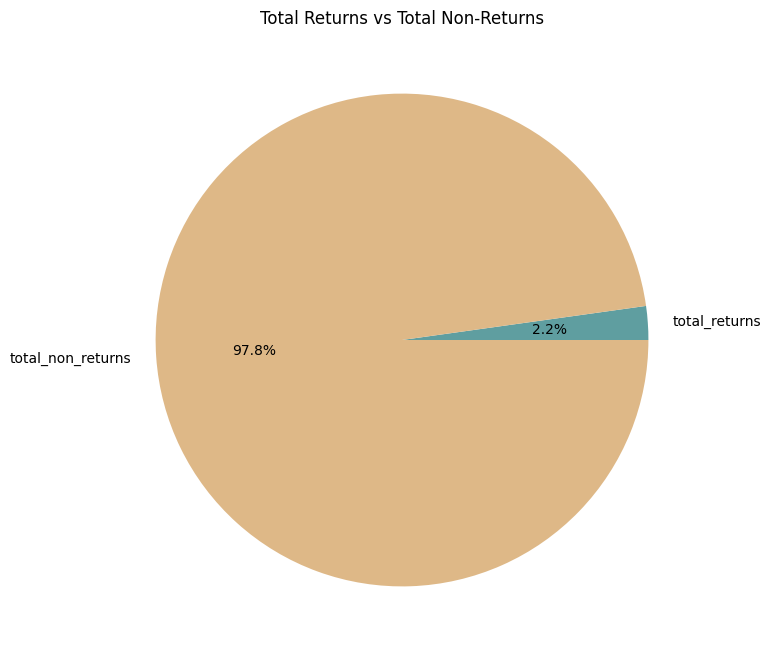

In [32]:
import matplotlib.pyplot as plt
labels =['total_returns', 'total_non_returns']
sizes = [total_returns, total_non_returns]
colors = ['cadetblue', 'burlywood']
plt.figure (figsize= (8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Total Returns vs Total Non-Returns')
plt.show()


In [33]:
# Crear una columna categórica basada en el monto total de la transacción (ejemplo: 'Low', 'Medium', 'High')
def categorize_total_amount(amount):
    if amount < 20:
        return 'Low'
    elif 20 <= amount < 100:
        return 'Medium'
    else:
        return 'High'

data_cleaned['AmountCategory'] = data_cleaned['TotalAmount'].apply(categorize_total_amount)

# Mostrar las primeras filas con las nuevas columnas
print(data_cleaned.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   

   Year  Month  Semester AmountCategory  
0  2010     12         2            Low  
1  2010     12      

In [36]:
low_sales = data_cleaned[data_cleaned['AmountCategory'] == 'Low'].shape[0]
medium_sales = data_cleaned[data_cleaned['AmountCategory'] == 'Medium'].shape[0]
high_sales = data_cleaned[data_cleaned['AmountCategory'] == 'High'].shape[0]

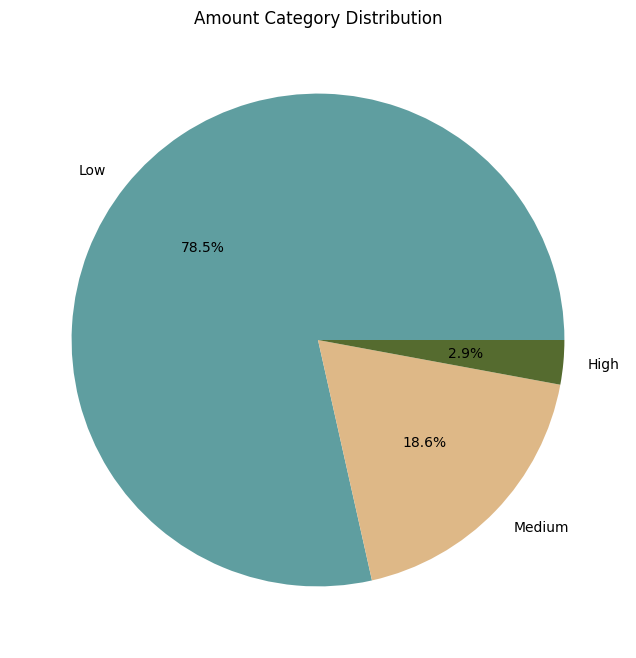

In [43]:
labels =['Low', 'Medium', 'High']
sizes = [low_sales, medium_sales, high_sales ]
colors = ['cadetblue', 'burlywood', 'darkolivegreen']
plt.figure (figsize= (8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Amount Category Distribution')
plt.show()

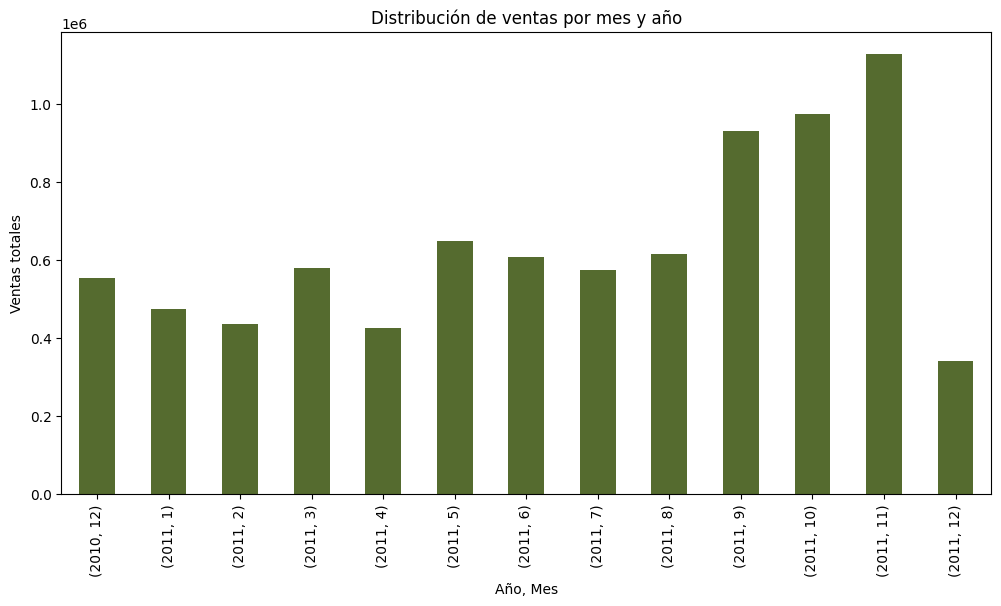

In [ ]:
plt.figure(figsize=(12,6))
colors = ['darkolivegreen']
data_cleaned.groupby(['Year', 'Month'])['TotalAmount'].sum().plot(kind='bar', color=colors * len(data_cleaned)) # Repite colores según la cantidad de barras
plt.title('Distribución de ventas por mes y año')
plt.xlabel('Año, Mes')
plt.ylabel('Ventas totales')
plt.show()

In [44]:
top_products = data_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index()
top_products = pd.merge(top_products, data_cleaned[['StockCode', 'Description']].drop_duplicates(),
                        on='StockCode', how='left')

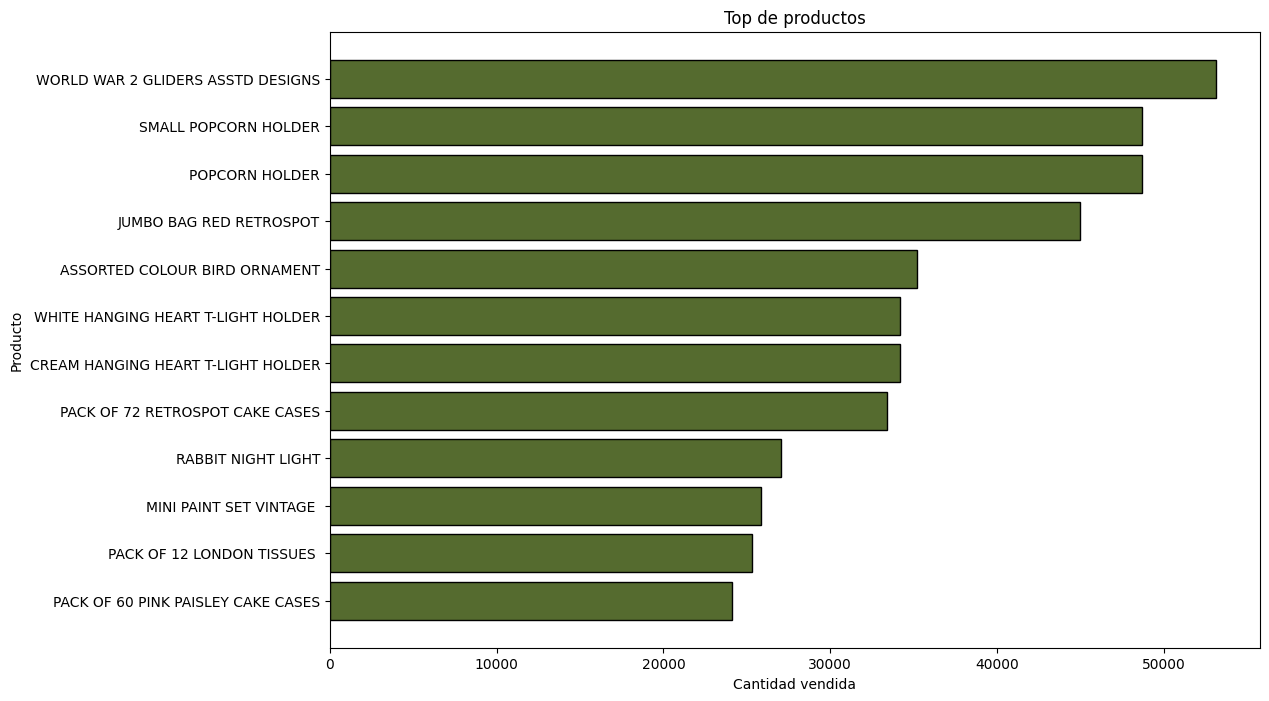

In [46]:
plt.figure(figsize=(12,8))
plt.barh(top_products['Description'],top_products['Quantity'], color='darkolivegreen',edgecolor='black')
plt.title('Top de productos')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()

plt.show()